This notebook was used to get familiar with the article metadata, espeacially to have a look at the key "msc" which I didn't understand at the time.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from itertools import chain

In [3]:
articles_df = pd.read_csv("../articles_data/full_df.csv")

In [49]:
articles_df = articles_df.drop_duplicates()
articles_df

,author_name,database,datestamp,document_type,doi,id,identifier,keywords,language,msc,ref_dois,reviewer_name,subtitle,text,title,year,zbmath_url
0,"Weilert, André",Zbl,0001-01-01T00:00:00Z,journal article,https://doi.org/10.1006/jsco.2000.0422,1570912,1053.11093,nothing,English,"JSON3.Object[{\n ""code"": ""11Y16"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,\((1+i)\)-ary GCD computation in \(\mathbb Z[i...,2000,https://zbmath.org/1570912
1,"Cesari, Giovanni",Zbl,0001-01-01T00:00:00Z,serial article,NaN,1254036,923.68075,package of parallel algorithms; CALYPSO,English,"JSON3.Object[{\n ""code"": ""68W30"",\n ""sch...",NaN,NaN,NaN,Summary: We present a package of parallel algo...,CALYPSO: A computer algebra library for parall...,1997,https://zbmath.org/1254036
2,"Cesaratto, Eda; Clément, Julien; Daireaux, Ben...",Zbl,2009-06-18T11:36:42Z,journal article,https://doi.org/10.1016/j.jsc.2008.04.018,5566485,1179.11049,Euclid algorithm; divide and conquer algorithm...,English,"JSON3.Object[{\n ""code"": ""11Y16"",\n ""sch...",NaN,Jean-Paul Allouche,NaN,zbMATH Open Web Interface contents unavailable...,Regularity of the Euclid algorithm; applicatio...,2009,https://zbmath.org/5566485
3,"Karl, Holger",Zbl,0001-01-01T00:00:00Z,serial article,NaN,1630137,969.68507,clusters of workstations,English,"JSON3.Object[{\n ""code"": ""68N19"",\n ""sch...",NaN,NaN,NaN,Summary: Clusters of workstations are an attra...,Fault-tolerance mechanisms for a parallel prog...,2000,https://zbmath.org/1630137
4,"Tuchman, Allan; Cybenko, George; Jablonowski, ...",Zbl,0001-01-01T00:00:00Z,serial article,NaN,434599,800.68976,remote data visualization,English,"JSON3.Object[{\n ""code"": ""68U05"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Vista: A system for remote data visualization,1992,https://zbmath.org/434599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325690,Not available; Not available,Zbl,2018-11-14T13:12:28Z,journal article,https://doi.org/10.1080/14697688.2017.1370122,6979450,1400.91534,zbMATH Open Web Interface contents unavailable...,zbMATH Open Web Interface contents unavailable...,"JSON3.Object[{\n ""code"": ""91G10"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Not available,2017,https://zbmath.org/6979450
325694,Not available; Not available,Zbl,2021-09-03T14:11:10Z,journal article,https://doi.org/10.1080/14697688.2017.1370122,7390935,1471.91529,zbMATH Open Web Interface contents unavailable...,zbMATH Open Web Interface contents unavailable...,"JSON3.Object[{\n ""code"": ""91G15"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Not available,2018,https://zbmath.org/7390935
325698,"Goel, Anubha; Sharma, Amita",Zbl,2022-05-16T14:04:26Z,journal article,https://doi.org/10.1016/j.physa.2019.123524,7527056,NaN,value-at-risk; mixed value-at-risk; mixed cond...,English,"JSON3.Object[{\n ""code"": ""82-XX"",\n ""sch...",NaN,NaN,NaN,zbMATH Open Web Interface contents unavailable...,Mixed value-at-risk and its numerical investig...,2020,https://zbmath.org/7527056
325713,"Tapiero, Oren J.",Zbl,2014-06-13T15:38:58Z,journal article,https://doi.org/10.3233/AF-13022,6304169,1290.91100,nothing,English,"JSON3.Object[{\n ""code"": ""91B30"",\n ""sch...",NaN,NaN,NaN,Summary: This paper provides a ``non-extensive...,The relationship between risk and incomplete s...,2013,https://zbmath.org/6304169


In [50]:
msc = articles_df["msc"].tolist()

In [51]:
msc1 = msc[0]

In [52]:
msc_json = []
for m in msc: 
    cleaned_string = m.replace('JSON3.Object[', '').rstrip(']')
    json_string = f'[{cleaned_string}]'
    try:
        result = json.loads(json_string)
    except json.JSONDecodeError:
        continue

    msc_json.append(result)

In [54]:
flattened_data = list(chain.from_iterable(msc_json))
msc_df = pd.DataFrame(flattened_data)

In [55]:
msc_df

,code,scheme,text
0,11Y16,msc2020,Number-theoretic algorithms; complexity
1,68W40,msc2020,Analysis of algorithms
2,68W30,msc2020,Symbolic computation and algebraic computation
3,11Y16,msc2020,Number-theoretic algorithms; complexity
4,37C30,msc2020,Functional analytic techniques in dynamical sy...
...,...,...,...
499586,94A17,msc2020,"Measures of information, entropy"
499587,91B16,msc2020,Utility theory
499588,91G80,msc2020,Financial applications of other theories
499589,91G10,msc2020,Portfolio theory


In [56]:
msc_no_dup = msc_df.drop_duplicates()
msc_no_dup

,code,scheme,text
0,11Y16,msc2020,Number-theoretic algorithms; complexity
1,68W40,msc2020,Analysis of algorithms
2,68W30,msc2020,Symbolic computation and algebraic computation
4,37C30,msc2020,Functional analytic techniques in dynamical sy...
6,68N19,msc2020,"Other programming paradigms (object-oriented, ..."
...,...,...,...
496552,58C06,msc2020,Set-valued and function-space-valued mappings ...
496671,32W30,msc2020,Heat kernels in several complex variables
497479,97I40,msc2020,Differential calculus (educational aspects)
498689,46Lxx,msc2020,Selfadjoint operator algebras (\(C^*\)-algebra...


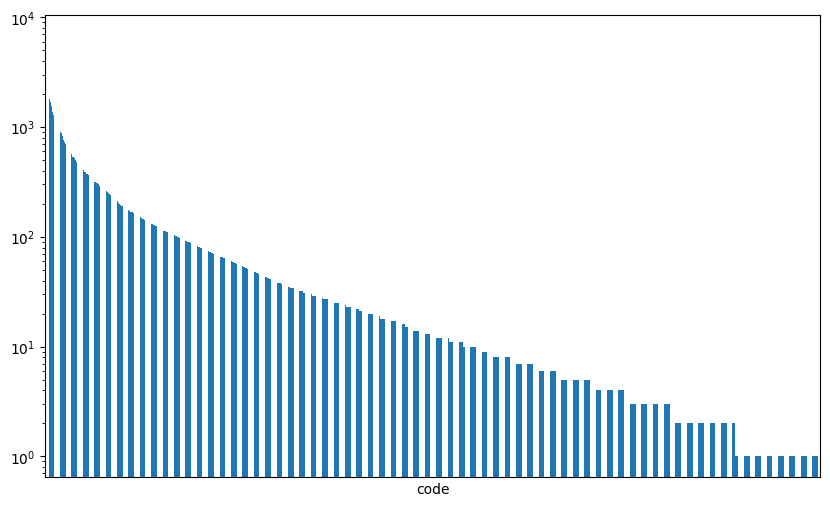

In [57]:
# histogram of the different codes
code_counts = msc_df['code'].value_counts()
code_counts.plot(kind='bar', figsize=(10, 6))
plt.yscale('log')
plt.xticks([])  # Remove x-axis ticks
plt.show()